In [1]:
import os
import yaml
import torch as pt
import matplotlib.pyplot as plt
from latent_diffusion.models import VQVAE
import numpy as np
from torchvision.utils import make_grid
from torchvision.io import read_image

In [2]:
with open("configs/coco17.yaml", encoding="utf-8") as f:
    cfg = yaml.safe_load(f)


In [3]:
model = VQVAE(cfg).to(cfg["trainer"]["device"])


In [4]:
checkpoint = pt.load("Coco17-14x14-lr-sched_best.pth", weights_only=True)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [5]:
model.eval()

VQVAE(
  (pre_quant): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (encoder): Encoder(
    (in_conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (layers): ModuleDict(
      (DownBlock_0): ModuleDict(
        (resblock_0): ModuleDict(
          (resblock_0_0): ResBlock(
            (tr_conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn_tr): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (layers): Sequential(
              (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU(inplace=True)
              (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
              (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
          )
         

In [6]:
codebook = model.vq.codebook

In [7]:
codebook.shape

torch.Size([4096, 3])

In [39]:
img = read_image("apple.jpg")

In [40]:
img = img/255.0

In [41]:
img.shape

torch.Size([3, 56, 56])

In [42]:
img = img.unsqueeze(0).to(cfg["trainer"]["device"])

In [43]:
x_, cd, cl, cdl, rl, _ = model(img)

In [49]:
grid = x_.squeeze(0).detach().permute((1,2,0)).clip(0,1).cpu().numpy()

In [50]:
code = cd.squeeze(0).detach().permute((1,2,0)).cpu().numpy()

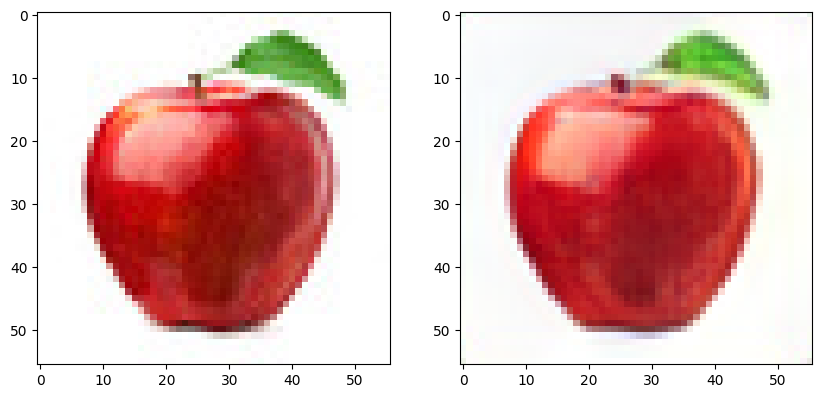

In [56]:
f = plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(img.squeeze(0).detach().permute((1,2,0)).cpu().clip(0,1).numpy())
plt.subplot(1,2,2)
plt.imshow(grid)
plt.show()

In [53]:
grid.max()


1.0

In [57]:
code

array([[[ 2.34208643e-01,  1.64979786e-01,  1.72393203e-01],
        [ 1.98105559e-01,  5.20226210e-02,  6.56117201e-02],
        [ 2.33811468e-01,  5.37844598e-02,  5.97192347e-03],
        [ 2.30314672e-01,  4.92695123e-02,  1.78594813e-02],
        [ 1.91599011e-01,  8.11465085e-02, -2.97889560e-02],
        [ 1.81215718e-01,  4.73548770e-02, -2.33566612e-02],
        [ 2.34150574e-01,  6.66779578e-02, -7.50529617e-02],
        [ 2.09920049e-01, -4.06697392e-03,  4.02984396e-02],
        [ 1.70956686e-01,  7.04214722e-02,  2.08246589e-01],
        [ 2.39183754e-02,  2.59278864e-01,  4.60831448e-02],
        [ 5.23887277e-02,  2.88023233e-01,  2.41336197e-01],
        [ 1.71110079e-01,  2.79512107e-02,  1.13228515e-01],
        [ 2.04127550e-01,  7.36179203e-02,  3.33116241e-02],
        [ 2.07268894e-01,  4.84304577e-02,  5.25139607e-02]],

       [[ 2.02507496e-01,  8.50336105e-02,  7.54084289e-02],
        [ 2.45842040e-01,  3.58837545e-02, -5.09322882e-02],
        [ 1.51742518e-

In [1]:
from diffusers.models import UNet2DConditionModel

In [2]:
?UNet2DConditionModel

Init signature:
UNet2DConditionModel(
    sample_size: Optional[int] = None,
    in_channels: int = 4,
    out_channels: int = 4,
    center_input_sample: bool = False,
    flip_sin_to_cos: bool = True,
    freq_shift: int = 0,
    down_block_types: Tuple[str] = ('CrossAttnDownBlock2D', 'CrossAttnDownBlock2D', 'CrossAttnDownBlock2D', 'DownBlock2D'),
    mid_block_type: Optional[str] = 'UNetMidBlock2DCrossAttn',
    up_block_types: Tuple[str] = ('UpBlock2D', 'CrossAttnUpBlock2D', 'CrossAttnUpBlock2D', 'CrossAttnUpBlock2D'),
    only_cross_attention: Union[bool, Tuple[bool]] = False,
    block_out_channels: Tuple[int] = (320, 640, 1280, 1280),
    layers_per_block: Union[int, Tuple[int]] = 2,
    downsample_padding: int = 1,
    mid_block_scale_factor: float = 1,
    dropout: float = 0.0,
    act_fn: str = 'silu',
    norm_num_groups: Optional[int] = 32,
    norm_eps: float = 1e-05,
    cross_attention_dim: Union[int, Tuple[int]] = 1280,
    transformer_layers_per_block: Union[int, Tuple